# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

Read the content of the image prediction file

In [4]:
df_image_prediction = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
comsumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

count = 0
fail_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

##### Read the content of tweet-json.txt into a dataframe
* The url below has the tweet info, I downloaded the content into tweet-json.txt in a folder named tweety
* In the folder created, I picked the text file and read the content, then created a dictionary that contains all lines in the file, and read the content into a dataframe

In [6]:
import requests
import os

folder_name = 'tweety'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)


In [7]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)


In [8]:
os.listdir(folder_name)

['tweet-json.txt']

In [9]:
import glob
import json
df_list = []
for tweet_data in glob.glob('tweety/*.txt'):
    with open(tweet_data, encoding='utf-8') as file:
        for line in file:
            json_data = json.loads(line)
            
            retweet_count = json_data['retweet_count']
            id_str = json_data['id_str']
            id = json_data['id']
            favorite_count = json_data['favorite_count']
            full_text = json_data['full_text']
            df_list.append({'tweet_id': id,
                           'favorite_count': favorite_count,
                           'retweet_count' : retweet_count,
                            'text': full_text
                           })
            
df_tweet_data = pd.DataFrame(df_list)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [15]:
df_twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
719,783391753726550016,NaN,NaN,2016-10-04 19:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783391753...,13,10,Godi,None,None,None,None
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's got doggles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788178268...,13,10,None,None,None,None,None
1085,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, we only rate dogs. Pls stop...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738184450...,9,10,None,None,None,None,None


In [16]:
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [17]:
# do value_counts to see the values of rating_numerator
df_twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [18]:
# see all values for rating_denominator
df_twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)


170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
df_image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
1259,748699167502000129,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,1,Pembroke,0.849029,True,Cardigan,8.362880e-02,True,kelpie,2.439450e-02,True
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,1.768280e-01,True,Dandie_Dinmont,7.013380e-02,True
593,679475951516934144,https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg,1,Maltese_dog,0.145742,True,toy_poodle,1.394070e-01,True,West_Highland_white_terrier,1.088210e-01,True
492,675706639471788032,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,English_springer,0.990300,True,Welsh_springer_spaniel,2.079910e-03,True,cocker_spaniel,2.013780e-03,True


In [20]:
df_tweet_data.sample(5)

,favorite_count,retweet_count,text,tweet_id
1609,10471,4535,"""Tristan do not speak to me with that kind of ...",685325112850124800
998,6397,2444,PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,747963614829678593
1355,2685,786,This pupper doesn't understand gates. 10/10 so...,703407252292673536
891,1846,561,No no no this is all wrong. The Walmart had to...,759446261539934208
1084,9635,3828,This is Axel. He's a professional leaf catcher...,738166403467907072


In [21]:
all_columns = pd.Series(list(df_twitter_archive) + list(df_image_prediction) + list(df_tweet_data))
all_columns[all_columns.duplicated()]

17    tweet_id
31        text
32    tweet_id
dtype: object

In [22]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_twitter_archive.loc[df_twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [24]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
text              2354 non-null object
tweet_id          2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [28]:
df_tweet_data[['favorite_count', 'retweet_count']].describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


### Quality issues
##### df_twitter_archive table:

1.Missing data on `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, drop these columns as they have very little non null values.

2.`expanded_urls`has incomplete data of 2297 out of 2367

3.We only want original tweets, not retweeted data. This table has retweeted data i.e data with `retweeted_status_id` not null.

4.`timestamp` column is of type object instead of type datetime


##### df_image_prediction table:

5.The prediction columns `p1`, `p2`, `p3` values are separated by underscore instead of space. Eg `Old_English_sheepdog` should be `Old English sheepdog` 

6.Inconsistent case for `p1`, `p2` and `p3` columns.

7.Missing records 2075 instead of 2356

##### df_tweet_data table:
8.We do not need tweets from August 1, 2017. Data from this date should be excluded from analysis

### Tidiness issues
1.Four different columns for dog type on df_twitter_archive table (`doggo`, `floofer`, `pupper`, `puppo`) should be colapsed into one

2.The `favorite_count` and `retweet_count` column of the `df_tweet_data` should be added to the grand table. The other columns already exists on the table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
df_archive_clean = df_twitter_archive.copy()
df_image_prediction_clean = df_image_prediction.copy()
df_tweet_data_clean = df_tweet_data.copy()


### Issue #1
Missing data on `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

#### Define
Drop these columns as they have very little non null values. They are not required in our analysis

#### Code

In [30]:
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id', 'in_reply_to_user_id'], axis = 1)

#### Test

In [31]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Issue #2: 
`expanded_urls` has incomplete data of 2297 out of 2367


#### Define:
For `expanded_urls` column, fill the null rows with a value using `.fillna`.

expanded_url = `https://twitter.com/dog_rates/status/` + `tweet_id` + `/photo/1`

#### Code


In [32]:
df_archive_clean.expanded_urls.fillna("https://twitter.com/dog_rates/status/" + str(df_archive_clean.tweet_id) + "/photo/1", inplace=True)

#### Test

In [33]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2356 non-null int64
timestamp              2356 non-null object
source                 2356 non-null object
text                   2356 non-null object
retweeted_status_id    181 non-null float64
expanded_urls          2356 non-null object
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
doggo                  2356 non-null object
floofer                2356 non-null object
pupper                 2356 non-null object
puppo                  2356 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


### Issue #3:
We only want original tweets, not retweeted data. This table has retweeted data i.e data with `retweeted_status_id` and `retweeted_status_user_id` not null.

#### Define
Delete retweeted data from `df_archive_clean` table i.e data with `retweeted_status_id`, `retweeted_status_timestamp`, `retweeted_status_user_id` not null.

#### Code

In [34]:
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean['retweeted_status_id'])]

#### Test

In [35]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2175 non-null int64
timestamp              2175 non-null object
source                 2175 non-null object
text                   2175 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          2175 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   2175 non-null object
doggo                  2175 non-null object
floofer                2175 non-null object
pupper                 2175 non-null object
puppo                  2175 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 237.9+ KB


### Issue #4:
Timestamp column is of type object instead of type datetime


#### Define
Update the data type for `timestamp` column to datetime type


#### Code

In [36]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])


#### Test

In [38]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2175 non-null int64
timestamp              2175 non-null datetime64[ns]
source                 2175 non-null object
text                   2175 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          2175 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   2175 non-null object
doggo                  2175 non-null object
floofer                2175 non-null object
pupper                 2175 non-null object
puppo                  2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 237.9+ KB


### Issue #5:
The prediction columns `p1`, `p2`, `p3` values are separated by underscore instead of space. Eg `Old_English_sheepdog` should be `Old English sheepdog` 


#### Define
Go through p1, p2 and p3 columns, replace all `_` in the values to ` `

#### Code

In [39]:
df_image_prediction_clean.p1 = df_image_prediction_clean.p1.str.replace('_', ' ', regex=True)
df_image_prediction_clean.p2 = df_image_prediction_clean.p2.str.replace('_', ' ', regex=True)
df_image_prediction_clean.p3 = df_image_prediction_clean.p3.str.replace('_', ' ', regex=True)

#### Test

In [40]:
df_image_prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1099,720415127506415616,https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg,1,Rottweiler,0.990312,True,black-and-tan coonhound,0.002495,True,American black bear,0.001733,False
1499,783821107061198850,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,Lakeland terrier,0.265659,True,golden retriever,0.196414,True,standard poodle,0.133534,True
1844,838916489579200512,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,web site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False
489,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,cocker spaniel,0.299708,True,golden retriever,0.263665,True,Irish setter,0.080323,True
1673,813127251579564032,https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg,1,Norwegian elkhound,0.432416,True,whippet,0.374223,True,Siberian husky,0.032463,True
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
1865,843235543001513987,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1,Pembroke,0.958452,True,Cardigan,0.023770,True,Chihuahua,0.005269,True
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese dog,0.759945,True,toy poodle,0.101194,True,Shih-Tzu,0.056037,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish wolfhound,0.004020,True


### Issue #6
Inconsistent case for `p1`, `p2` and `p3` columns.

#### Define
Capitalize the first letter of each word in the p1, p2 and p3 columns of the `df_image_predicitions_clean` dataframe

#### Code

In [41]:
df_image_prediction_clean.p1 = df_image_prediction_clean.p1.str.title()
df_image_prediction_clean.p2 = df_image_prediction_clean.p2.str.title()
df_image_prediction_clean.p3 = df_image_prediction_clean.p3.str.title()

#### Test

In [42]:
df_image_prediction_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1424,772152991789019136,https://pbs.twimg.com/media/Crc9DEoWEAE7RLH.jpg,2,Golden Retriever,0.275318,True,Irish Setter,0.100988,True,Vizsla,0.073525,True
1492,782969140009107456,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,Seat Belt,0.474292,False,Golden Retriever,0.171393,True,Labrador Retriever,0.110592,True
1553,793165685325201412,https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg,1,Golden Retriever,0.946224,True,Labrador Retriever,0.036477,True,Doormat,0.002353,False


### Issue #7
Missing records 2075 instead of 2356 on `df_image_prediction_clean`


#### Define
Merge `df_archive_clean` table with the `df_image_prediction_clean` table on `tweet_id`. `tweet_id` is the similar column for both tables that can serve as a unique identifier.


##### Code

In [46]:
# merge both tables together
df_rate_dog_tweets = pd.merge(df_archive_clean, df_image_prediction_clean, on="tweet_id", how="right")


#### Test
From the info, we realize that the new table has all columns from tweet archive and the image predictions dataframe.

In [47]:
df_rate_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id               2075 non-null int64
timestamp              1994 non-null datetime64[ns]
source                 1994 non-null object
text                   1994 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1994 non-null object
rating_numerator       1994 non-null float64
rating_denominator     1994 non-null float64
name                   1994 non-null object
doggo                  1994 non-null object
floofer                1994 non-null object
pupper                 1994 non-null object
puppo                  1994 non-null object
jpg_url                2075 non-null object
img_num                2075 non-null int64
p1                     2075 non-null object
p1_conf                2075 non-null float64
p1_dog                 2075 non-null bool
p2                     2075 non-null object
p2_conf                2075 non-null float64
p2_dog 

### Issue #8:
We do not need tweets from August 1, 2017. Data from this date should be excluded from analysis

#### Define
Fetch data where timestamp is higher than 2017-08-01 and drop it. None was found on the table

#### Code

In [48]:
df_rate_dog_tweets[(df_rate_dog_tweets['timestamp'] > '2017-08-02')]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Test

In [49]:
df_rate_dog_tweets[(df_rate_dog_tweets['timestamp'] > '2017-08-02')]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Tidyness Issue

### Issue #1
The `favorite_count` and `retweet_count` column of the `df_tweet_data` should be added to the grand table. The other columns already exists on the table

#### Define
Merge the favourite_count, retweet_count on  `df_tweet_data` with the resulting table from above `df_rate_dog_tweets`, to get a grand table of all the required tweet with appropriate columns

#### Code

In [50]:
df_rate_dog_tweets = pd.merge(df_rate_dog_tweets, df_tweet_data, on=["tweet_id", "text"], how="left")

#### Test

In [51]:
df_rate_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 26 columns):
tweet_id               2075 non-null int64
timestamp              1994 non-null datetime64[ns]
source                 1994 non-null object
text                   1994 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1994 non-null object
rating_numerator       1994 non-null float64
rating_denominator     1994 non-null float64
name                   1994 non-null object
doggo                  1994 non-null object
floofer                1994 non-null object
pupper                 1994 non-null object
puppo                  1994 non-null object
jpg_url                2075 non-null object
img_num                2075 non-null int64
p1                     2075 non-null object
p1_conf                2075 non-null float64
p1_dog                 2075 non-null bool
p2                     2075 non-null object
p2_conf                2075 non-null float64
p2_dog 

### Issue #2
Four different columns for dog type on df_twitter_archive table (`doggo`, `floofer`, `pupper`, `puppo`) should be colapsed into one


#### Define
Replace the none values in columns doggo, floofer, puppo and pupper with ''
Then create a new column `dog_stage` with the value for the dog stage.

#### Code

In [52]:
df_rate_dog_tweets['doggo'].replace('None', '', inplace=True)
df_rate_dog_tweets['floofer'].replace('None', '', inplace=True)
df_rate_dog_tweets['pupper'].replace('None', '', inplace=True)
df_rate_dog_tweets['puppo'].replace('None', '', inplace=True)

df_rate_dog_tweets['dog_stage'] = df_rate_dog_tweets['doggo'] + df_rate_dog_tweets['floofer'] + df_rate_dog_tweets['pupper'] + df_rate_dog_tweets['puppo']



In [53]:
#drop the columns doggo, floofer, pupper, puppo
df_rate_dog_tweets = df_rate_dog_tweets.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1)

In [54]:
#Replace all dog_stage column that are null with 
df_rate_dog_tweets['dog_stage'] = df_rate_dog_tweets['dog_stage'].fillna('Unknown')

#### Test

In [55]:
df_rate_dog_tweets['dog_stage'].value_counts()

                1688
pupper           203
Unknown           81
doggo             63
puppo             22
doggopupper        9
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [56]:
df_rate_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id               2075 non-null int64
timestamp              1994 non-null datetime64[ns]
source                 1994 non-null object
text                   1994 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1994 non-null object
rating_numerator       1994 non-null float64
rating_denominator     1994 non-null float64
name                   1994 non-null object
jpg_url                2075 non-null object
img_num                2075 non-null int64
p1                     2075 non-null object
p1_conf                2075 non-null float64
p1_dog                 2075 non-null bool
p2                     2075 non-null object
p2_conf                2075 non-null float64
p2_dog                 2075 non-null bool
p3                     2075 non-null object
p3_conf                2075 non-null float64
p3_dog                 2075 non-null bool
favorite_c

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
df_rate_dog_tweets.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

weRateDog_data = pd.read_csv('twitter_archive_master.csv')
weRateDog_data['timestamp'] = weRateDog_data['timestamp'].astype('datetime64[ns]')
weRateDog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id               2075 non-null int64
timestamp              1994 non-null datetime64[ns]
source                 1994 non-null object
text                   1994 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1994 non-null object
rating_numerator       1994 non-null float64
rating_denominator     1994 non-null float64
name                   1994 non-null object
jpg_url                2075 non-null object
img_num                2075 non-null int64
p1                     2075 non-null object
p1_conf                2075 non-null float64
p1_dog                 2075 non-null bool
p2                     2075 non-null object
p2_conf                2075 non-null float64
p2_dog                 2075 non-null bool
p3                     2075 non-null object
p3_conf                2075 non-null float64
p3_dog                 2075 non-null bool
favorite_c

In [59]:
weRateDog_data[['favorite_count', 'retweet_count', 'p1_conf']].describe()

,favorite_count,retweet_count,p1_conf
count,1994.000000,1994.000000,2075.000000
mean,8895.725677,2766.753260,0.594548
std,12213.193181,4674.698447,0.271174
min,81.000000,16.000000,0.044333
25%,1982.000000,624.750000,0.364412
50%,4136.000000,1359.500000,0.588230
75%,11308.000000,3220.000000,0.843855
max,132810.000000,79515.000000,1.000000


In [60]:
weRateDog_data['rating_numerator'].value_counts().sort_index(ascending = False)

1776.0      1
420.0       1
204.0       1
165.0       1
144.0       1
143.0       1
121.0       1
99.0        1
88.0        1
84.0        1
80.0        1
75.0        1
60.0        1
50.0        1
45.0        1
44.0        1
27.0        1
26.0        1
24.0        1
14.0       35
13.0      261
12.0      450
11.0      396
10.0      419
9.0       151
8.0        95
7.0        52
6.0        32
5.0        33
4.0        16
3.0        19
2.0         9
1.0         5
0.0         2
Name: rating_numerator, dtype: int64

### Visualization

### Insights:



#### 1. Which of the dog stages is highly rated?

From the analysis below, we pick the most common dog stages and plotted it against its count. The most common dog stage found in the data is pupper. It is the most rated dog stage as well.

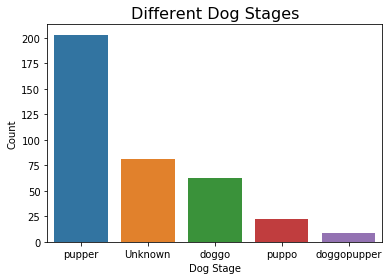

In [56]:
dog_stages = weRateDog_data['dog_stage'].value_counts()[0:5].index
sns.countplot(data = weRateDog_data, x = 'dog_stage', order = dog_stages)
plt.xlabel('Dog Stage', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Different Dog Stages',fontsize=16)
plt.savefig('Dog_stages.png');


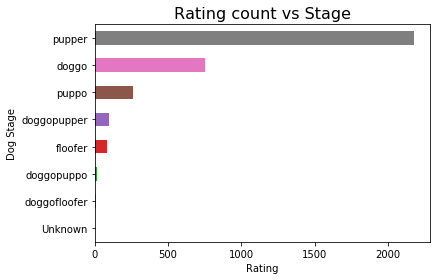

In [57]:
# Now group the dog stages by the rating_numerator and plot a bar chart of it
weRateDog_data.groupby('dog_stage')['rating_numerator'].sum().sort_values(ascending=True).plot.barh()
plt.xlabel('Rating', fontsize=10)
plt.ylabel('Dog Stage', fontsize=10)
plt.title('Rating count vs Stage',fontsize=16)
plt.savefig('rating_stage.png');


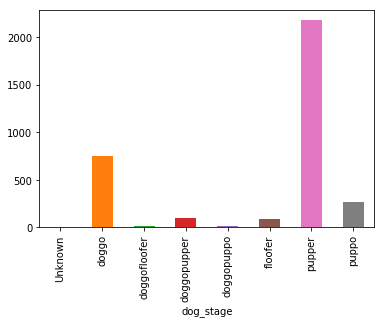

In [58]:
weRateDog_data.groupby('dog_stage')['rating_numerator'].sum().plot.bar()

#### 2.Which dog stage has the most retweet and favourite count
From the analysis we see that `Puppo` dog stage has more likes in the tweet data while `Doggo` dog stage has more retweets

In [189]:
# pay attention to only dogs with dog_stage not null
weRateDog_data = weRateDog_data[weRateDog_data["dog_stage"].isnull()==False]

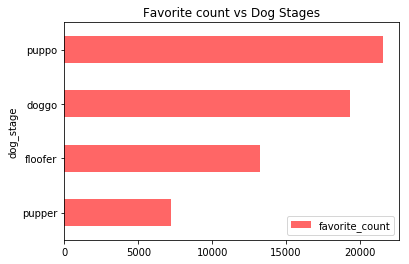

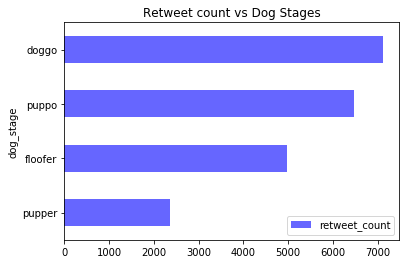

In [59]:
dog_stages = weRateDog_data.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')

favorite_counts_by_stages = pd.DataFrame(dog_stages.groupby('dog_stage').favorite_count.mean().sort_values())
favorite_counts_by_stages['dog_stage'] = favorite_counts_by_stages.index
favorite_counts_by_stages.plot(x="dog_stage", y='favorite_count', kind='barh', title="Favorite count vs Dog Stages", color='r', alpha=0.6)

retweet_counts_by_stages = pd.DataFrame(dog_stages.groupby('dog_stage').retweet_count.mean().sort_values())
retweet_counts_by_stages['dog_stage'] = retweet_counts_by_stages.index
retweet_counts_by_stages.plot(x="dog_stage", y='retweet_count', kind='barh', title="Retweet count vs Dog Stages", color='b', alpha=0.6)


### 3. Does the retweets and favorite count influnce the dog rating?
From the analysis below, yes, it does.

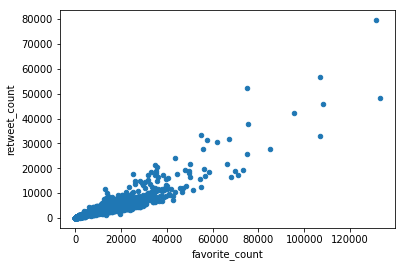

In [60]:
weRateDog_data.plot(x = 'favorite_count', y = 'retweet_count', kind = 'scatter');

Text(0,0.5,'Favorites')

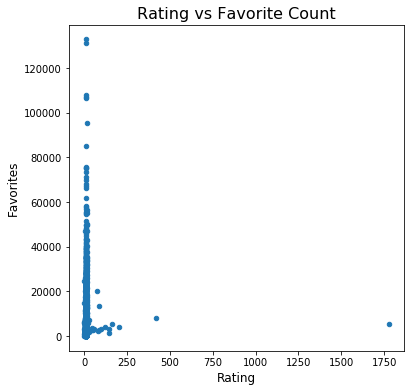

In [61]:
weRateDog_data.plot(x = 'rating_numerator', y = 'favorite_count', kind ='scatter', figsize=(6,6));
plt.title('Rating vs Favorite Count', size=16)
plt.xlabel('Rating', size=12)
plt.ylabel('Favorites', size=12)

Text(0,0.5,'Retweet')

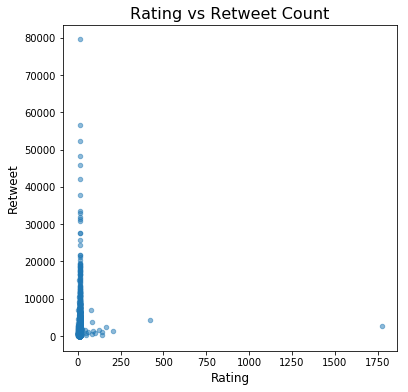

In [63]:
weRateDog_data.plot(x = 'rating_numerator', y = 'retweet_count', kind ='scatter', alpha=.5, figsize=(6,6));
plt.title('Rating vs Retweet Count', size=16)
plt.xlabel('Rating', size=12)
plt.ylabel('Retweet', size=12)